## Data From:  
https://codebasics.io/challenge/codebasics-resume-project-challenge

For this project, I will use a machine learning clustering model to perform customer segmentation and identify the best customer group for the new credit card campaign.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_customer = pd.read_csv(r'D:\pleng\customer.csv')
df_spend = pd.read_csv(r'D:\pleng\spend.csv')

In [3]:
df = pd.merge(df_customer, df_spend, on = 'customer_id', how = 'inner')

In [4]:
df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


#### Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,avg_income,spend
count,864000.000000,864000.000000
mean,51657.032250,614.464994
std,14688.312762,661.571676
min,24816.000000,6.000000
25%,38701.000000,191.000000
50%,50422.000000,395.000000
75%,64773.250000,793.000000
max,86600.000000,10313.000000


In [7]:
len(np.unique(df['customer_id']))

4000

In [8]:
df2 = pd.DataFrame(df.groupby(['customer_id', 'city', 'occupation', 'age_group', 'gender', 'avg_income']).agg({'spend': 'sum'}).reset_index())
def avg_spend(df2):
    return (df2['spend']/6)

df2['avg_spend'] = df2.apply(avg_spend, axis = 1)

In [9]:
df2 = df2.drop('spend', axis = 1)
df2

,customer_id,city,occupation,age_group,gender,avg_income,avg_spend
0,ATQCUS0001,Mumbai,Salaried IT Employees,21-24,Male,49767,28424.166667
1,ATQCUS0002,Mumbai,Salaried IT Employees,21-24,Male,47336,28085.666667
2,ATQCUS0003,Mumbai,Salaried IT Employees,21-24,Male,48851,26255.666667
3,ATQCUS0004,Mumbai,Salaried IT Employees,21-24,Male,45425,27109.166667
4,ATQCUS0005,Mumbai,Salaried IT Employees,21-24,Male,46732,26216.000000
...,...,...,...,...,...,...,...
3995,ATQCUS3996,Chennai,Business Owners,25-34,Female,68003,16598.166667
3996,ATQCUS3997,Chennai,Freelancers,25-34,Female,33323,9377.333333
3997,ATQCUS3998,Chennai,Freelancers,25-34,Female,33336,9960.000000
3998,ATQCUS3999,Chennai,Freelancers,25-34,Female,37453,11190.333333


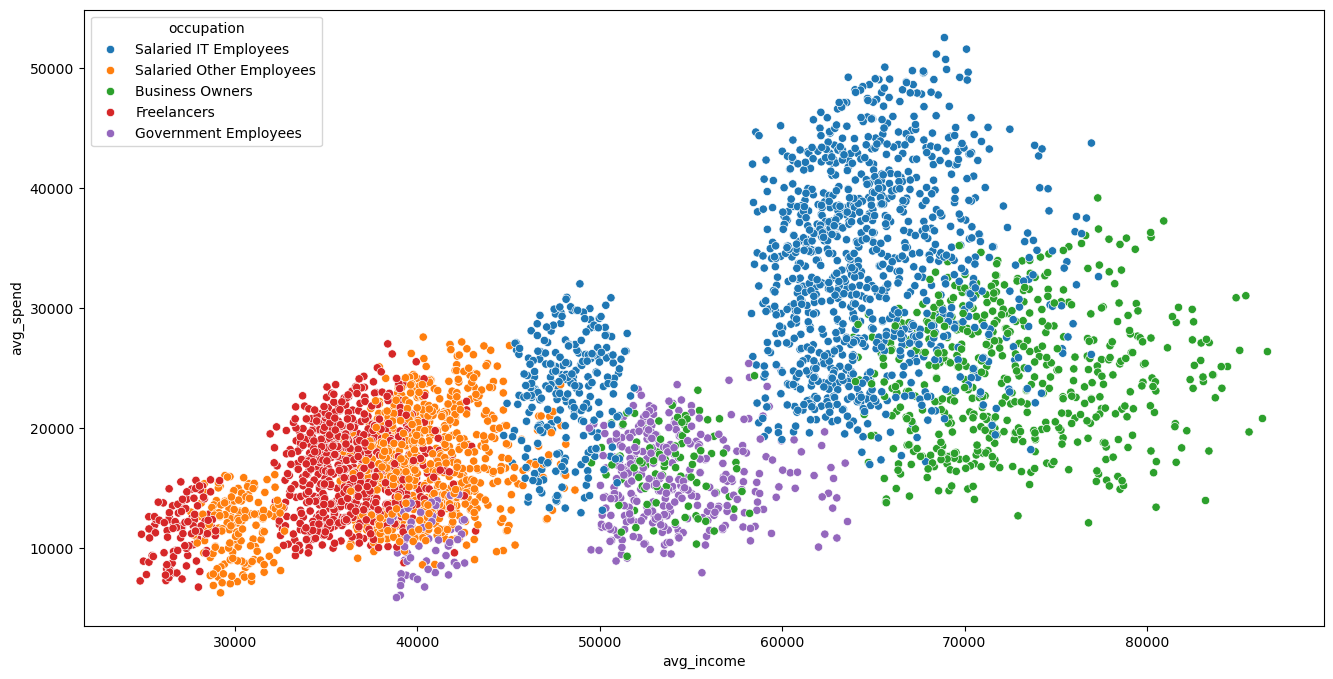

In [10]:
plt.figure(figsize=(16,8))
sns.scatterplot(data = df2, x = 'avg_income', y = 'avg_spend', hue = 'occupation');

### Clustering 

In [11]:
clustering2 = KMeans(n_clusters = 4)
clustering2.fit(df2[['avg_income', 'avg_spend']])
df2['spend_income_cluster'] = clustering2.labels_
df2

,customer_id,city,occupation,age_group,gender,avg_income,avg_spend,spend_income_cluster
0,ATQCUS0001,Mumbai,Salaried IT Employees,21-24,Male,49767,28424.166667,2
1,ATQCUS0002,Mumbai,Salaried IT Employees,21-24,Male,47336,28085.666667,2
2,ATQCUS0003,Mumbai,Salaried IT Employees,21-24,Male,48851,26255.666667,2
3,ATQCUS0004,Mumbai,Salaried IT Employees,21-24,Male,45425,27109.166667,2
4,ATQCUS0005,Mumbai,Salaried IT Employees,21-24,Male,46732,26216.000000,2
...,...,...,...,...,...,...,...,...
3995,ATQCUS3996,Chennai,Business Owners,25-34,Female,68003,16598.166667,0
3996,ATQCUS3997,Chennai,Freelancers,25-34,Female,33323,9377.333333,1
3997,ATQCUS3998,Chennai,Freelancers,25-34,Female,33336,9960.000000,1
3998,ATQCUS3999,Chennai,Freelancers,25-34,Female,37453,11190.333333,1


In [12]:
df2['spend_income_cluster'].value_counts()

spend_income_cluster
1    1653
0     873
2     791
3     683
Name: count, dtype: int64

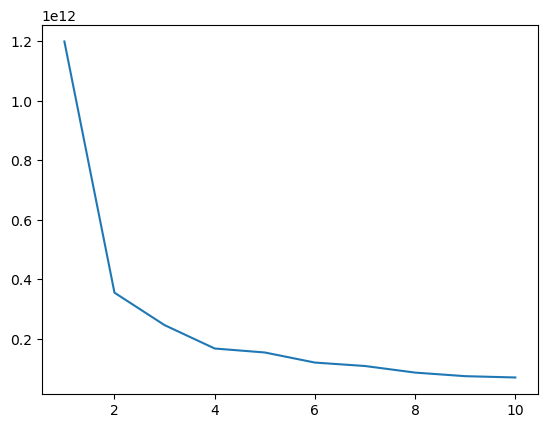

In [13]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df2[['avg_income', 'avg_spend']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

elbow at 4, use n_clusters = 4

In [14]:
centers  = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

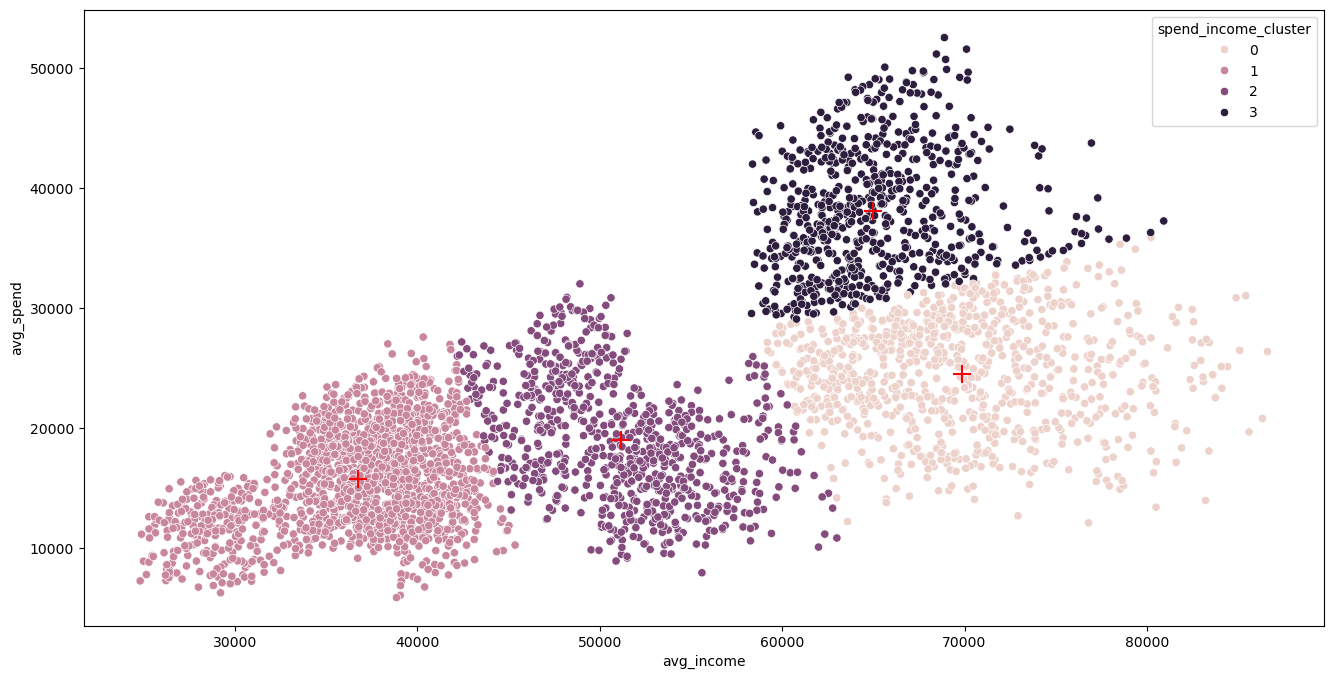

In [15]:
plt.figure(figsize=(16,8))

sns.scatterplot(data=df2, x = 'avg_income', y = 'avg_spend', hue = 'spend_income_cluster')
plt.scatter(x=centers['x'], y=centers['y'], s=150, c = 'red', marker = '+')

In [16]:
pd.crosstab(df2['spend_income_cluster'], df2['occupation'])

occupation,Business Owners,Freelancers,Government Employees,Salaried IT Employees,Salaried Other Employees
spend_income_cluster,,,,,
0,516,0,8,349,0
1,0,784,66,0,803
2,91,0,325,285,90
3,23,0,0,660,0


In [17]:
pd.crosstab(df2['spend_income_cluster'], df2['age_group'])

age_group,21-24,25-34,35-45,45+
spend_income_cluster,,,,
0,0,366,265,242
1,334,605,562,152
2,357,212,136,86
3,0,315,310,58


In [18]:
pd.crosstab(df2['spend_income_cluster'], df2['city'])

city,Bengaluru,Chennai,Delhi NCR,Hyderabad,Mumbai
spend_income_cluster,,,,,
0,134,309,105,182,143
1,330,380,295,234,414
2,141,142,143,123,242
3,146,3,201,54,279


In [19]:
df2.groupby('spend_income_cluster').agg({'avg_income': 'mean', 'avg_spend': 'mean'})

,avg_income,avg_spend
spend_income_cluster,,
0,69877.273769,24518.462199
1,36756.440411,15768.638435
2,51183.288243,18965.030763
3,64979.344070,38084.103953


#### Summary

Cluster Group 3 has a high income and the highest spending. Most customers in Cluster 3 are Business Owners and Salaried IT Employees.
Cluster Group 1 has the lowest income and spending, with most customers working as Freelancers and Salaried employees in other fields.  
So, when launching a new credit card, we might first consider targeting customers in Cluster Group 3, followed by Cluster Group 0, then Cluster Group 2, and finally Cluster Group 1.